# k-Nearest Neighbors (k-NN)


ใน tutorial ก่อนหน้านี้ เราได้เรียนรู้การทำงานของ linear regression, logistic regression, support vector machine, decision tree และ random forest ซึ่งเป็น supervised machine learning algorithms ชนิดมีโมเดลพารามิเตอร์ที่ต้องปรับเพื่อ optimize โมเดล  ใน tutorial นี้ เราจะมาแนะนำ **k-Nearest Neighbors (k-NN)** ซึ่งเป็นตัวอย่างของ supervised machine learning algorithm ชนิด **non-parametric** กล่าวคือ k-NN algorithm เป็นโมเดลที่ไม่มีโมเดลพารามิเตอร์ ทำได้ทั้งการจำแนกหมวดหมู่ (classification) และ การทำนายค่า (regression)  โดยอ้างอิงจากความใกล้ชิดของจุดข้อมูล (proximity) บน feature space ภายใต้สมมติฐานที่ว่า จะพบจุดข้อมูลที่คล้ายกันอยู่ใกล้กัน โดยใน tutorial นี้ เราจะแสดงการทำงานของโมเดลกับโจทย์การจำแนกหมวดหมู่

สมมติ ว่า เรามีจุดข้อมูลที่ต้องการทราบว่าอยู่ในคลาสไหน กระบวนการทำงานของ k-NN algorithm เริ่มต้นด้วยการค้นหาจุดข้อมูลเพื่อนบ้านจำนวน $k$ จุดที่อยู่ใกล้กับจุดข้อมูลที่สนใจมากที่สุด โดยพิจารณาจากระยะห่างระหว่างจุดข้อมูลที่สนใจและจุดข้อมูลเพื่อนบ้าน จากนั้นโมเดลจะทำนายคลาสของจุดที่สนใจจากผลโหวดของจุดข้อมูลเพื่อนบ้านที่ถูกคัดเลือกมาจำนวน k จุดนั้น

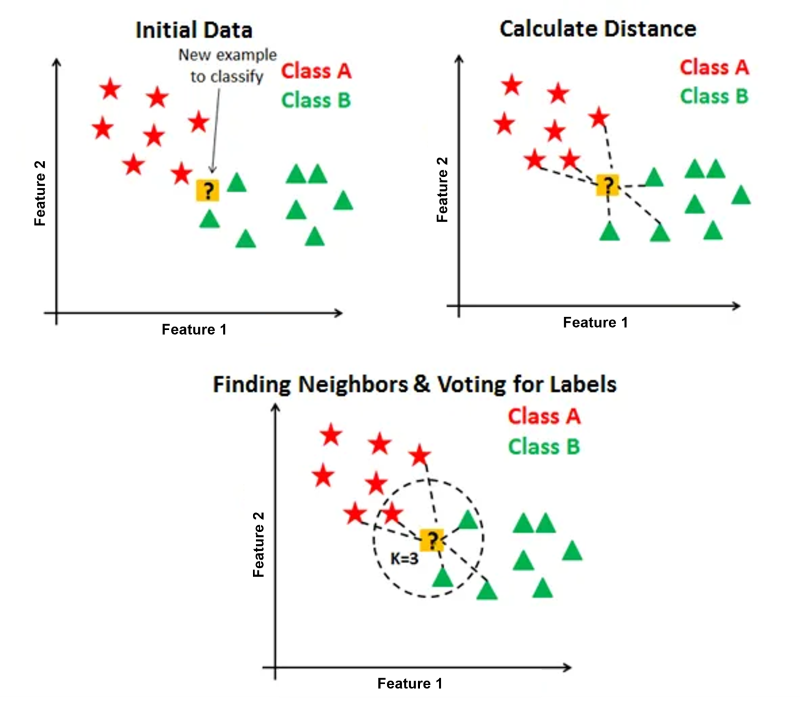

k-NN algorithm adapted from [ที่มา](https://blakelobato1.medium.com/k-nearest-neighbor-classifier-implement-homemade-class-compare-with-sklearn-import-6896f49b89e)

จากรูปตัวอย่างนี้ โมเดล k-NN กำหนดจำนวนจุดข้อมูลเพื่อนบ้าน $k=3$ ที่จะถูกใช้ในการโหวดเพื่อทำนายคลาสของจุดข้อมูลสีเหลือง  โดยพบว่า ในวงเพื่อนบ้านทั้งสาม ประกอบด้วย class A จำนวน 1 จุดข้อมูล และ class B จำนวน 2 จุดข้อมูล  ดังนั้น จุดข้อมูลสีเหลืองจะถูกทำนาย ว่า อยู่ใน class B

ทั้งนี้ ในตัวอย่างนี้เป็นการคำนวณระยะห่างของจุดข้อมูลด้วย Euclidean distance แต่ยังมีการพิจารณาระยะห่างแบบอื่นๆ อีก ดังต่อไปนี้

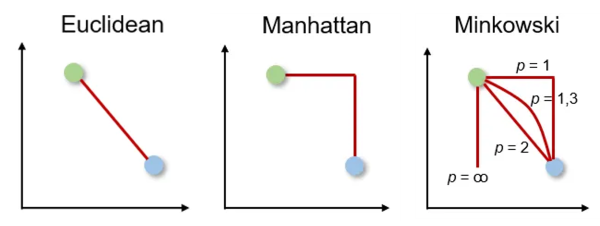

ที่มา [A brief introduction to Distance Measures](https://medium.com/mlearning-ai/a-brief-introduction-to-distance-measures-ac89cbd2298)

สมมติว่า จุดข้อมูล 2 จุดบน feature space สามารถแทนด้วยเวกเตอร์ $\vec{r_1}=(r_{1,1}, r_{1,2},..., r_{1,i},..., r_{1,m})$ และ $\vec{r_2}=(r_{2,1}, r_{2,2},..., r_{2,i},..., r_{2,m})$  เมื่อ  $m$ คือ จำนวน features  การหาระยะห่างระหว่างจุดข้อมูลทั้งสองสามารถคำนวณได้หลายวิธี โดยเราจะยกตัวอย่าง 3 สมการหลักที่ใช้กันทั่วไป ได้แก่

1. Euclidean Distance

Euclidean distance คือระยะทางเป็นเส้นตรงระหว่างจุดสองจุดใน Euclidean space จึงสามารถคำนวณได้โดยใช้ทฤษฎีพีทาโกรัส (Pythagorean theorem)

$$
d_{Euclidean}(\vec{r_1},\vec{r_2}) = \sqrt{\sum_{j=1}^{m} (r_{1,j} - r_{2,j})^2}
$$

2. Manhattan Distance:

Manhattan distance หรือที่รู้จักกันในอีกชื่อ taxicab distance เนื่องจากพัฒนามาจากแนวคิดที่ว่า ระยะห่างระหว่างจุดสองจุดสามารถหาได้จากเส้นตาราง (grid) แทนที่จะเป็นเส้นตรง เหมือนเวลาที่รถแท็กซี่ขับไปบนถนนจากจุดหนึ่งไปสู่อีกจุดหนึ่งบนเกาะ Manhattan ที่มีการวางผังถนนเป็นเส้นตรงตัดกัน  ดังนั้น Manhattan distance คำนวณระยะห่างโดยรวมความแตกต่างสัมบูรณ์ของพิกัดระหว่างจุดสองจุด

$$
d_{Manhattan}(\vec{r_1},\vec{r_2}) = \sum_{j=1}^{m} |r_{1,j} - r_{2,j}|
$$

3. Minkowski Distance

Minkowski distance เป็นการ generalization ของ Euclidean distance และ Manhattan distance

$$
d_{Minkowski}(\vec{r_1},\vec{r_2}) = \sum_{j=1}^{m} \big(|r_{1,j} - r_{2,j}|^p\big)^{1/p}
$$

พารามิเตอร์ $p\ge1$ ใช้กำหนดรูปแบบของระยะทาง โดย
- เมื่อ $p=1$ Minkowski distance จะมีค่าเท่ากับ Manhattan distance
- เมื่อ $p=2$ Minkowski distance จะมีค่าเท่ากับ Euclidean distance
- เมื่อ $1<p<2$ Minkowski distance จะมีคุณลักษณะผสมผสานระหว่าง Euclidean distance และ Manhattan distance
ซึ่งสามารถควบคุมได้โดยการปรับค่า $p$

สำหรับ classification problem เราสามารถเทรนโมเดล k-NN Classifier โดยการเรียกใช้  [KNC](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) จากไลบราลี่ `scikit-learn` ที่มี Minkowski distance และ $p=2$ เป็น default `metric` (ซึ่งก็คือ Euclidean distance)

นอกจากนี้ ยังมีการวัดระยะห่างระหว่างจุดข้อมูลด้วยวิธีอื่นๆ อีก  ซึ่งสามารถกลับไปย้อนดูตัวอย่างได้จาก Nonlinear Methods ที่เรียนในสัปดาห์ที่ 4

เพื่อศึกษาการทำงานของ k-NN เราจะลองสร้างชุดข้อมูลที่ประกอบไปด้วยข้อมูลจำนวน $200$ จุด ที่ประกอบด้วย 2 features และ 2 classes ได้แก่ class 0 และ class 1 (2-class dataset for binary classification)  โดยข้อมูลในแต่ละคลาสมีจำนวนเท่ากันที่ 100 จุด

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# ตั้งค่า random seed สำหรับการทำซ้ำ (reproducibility)
RANDOM_SEED = 2566

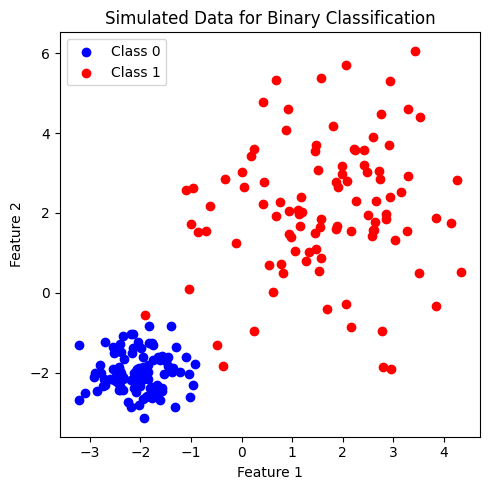

In [ ]:
def generate_multi_class_dataset(n_classes, mean_class, std_class, n_samples):
    # สร้างชุดข้อมูลแบบ multi-class
    # ตั้งค่า random seed เพื่อให้สามารถสร้างชุดข้อมูลเดิมทุกครั้ง เพื่อใช้สำหรับการสอน
    np.random.seed(RANDOM_SEED)

    # กำหนด จำนวน features
    n_features = 2

    #  สร้างข้อมูล x สำหรับแต่ละคลาส
    x_data = []
    for label in range(n_classes):
        _ = np.random.normal(mean_class[label], std_class[label], (n_samples, n_features))
        x_data.append(_)

    # สร้างข้อมูล y หรือ labels สำหรับแต่ละคลาส
    y_data = []
    y_data.append(np.zeros(n_samples))
    for label in range(1, n_classes):
        y_data.append(label*np.ones(n_samples))

    # รวมข้อมูล x และ y จากทุกคลาส
    x = np.vstack((x_data))
    y = np.hstack(y_data)

    return x, y

# ทดลองสร้างข้อมูลโดยการเรียกใช้ generate_multi_class_dataset
# กำหนด จำนวนคลาส
n_classes = 2

# กำหนดช่วงค่า Mean และ standard deviation สำหรับแต่ละคลาส
mean_class = [[-2,-2], [2,2]]
std_class  = [[0.5,0.5], [1.5,1.5]]

# กำหนดจำนวนข้อมูล สำหรับแต่ละคลาส
n_samples = 100

# ทำการสร้างชุดข้อมูล
x, y = generate_multi_class_dataset(n_classes, mean_class, std_class,n_samples)

# Plot ข้อมูล x, y ที่มีอยู่
plt.figure(figsize = (5,5))
plt.scatter(x[y==0, 0], x[y==0, 1], c='b', label='Class 0')
plt.scatter(x[y==1, 0], x[y==1, 1], c='r', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Simulated Data for Binary Classification')
plt.legend()
plt.tight_layout()
plt.show()

## k-NN เมื่อปรับชนิด `'metric'` ที่ใช้คำนวณ distance ระหว่างจุดข้อมูล

เราจะลองใช้ `metric` ที่แตกต่างกัน เพื่อดูผลของการจำแนกคลาสจาก decision boundary

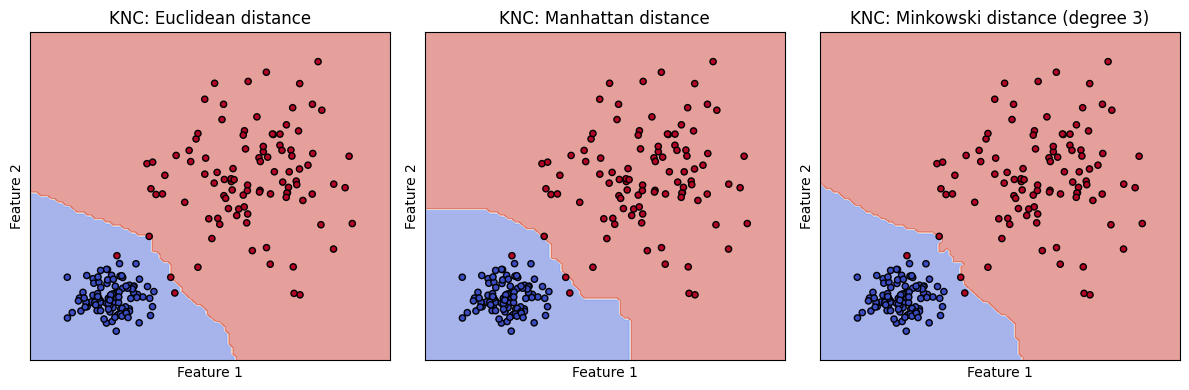

In [ ]:
# สร้างชุดโมเดล
weight = 'uniform'
models = (KNC(weights=weight, metric='euclidean'),
          KNC(weights=weight, metric='manhattan'),
          KNC(weights=weight,  metric='minkowski', p=3),
          )

# สอนโมเดลจากข้อมูล x, y ที่สร้างขึ้นก่อนหน้านี้
models = (clf.fit(x, y) for clf in models)

# ตั้งชื่อ plot ที่สอดคล้องกับชุดข้อมูล
titles = ['KNC: Euclidean distance',
          'KNC: Manhattan distance',
          'KNC: Minkowski distance (degree 3)'
          ]

# plot the decision boundaries
fig, axes = plt.subplots(1,3, figsize=(4*3, 4))
for clf, title, ax in zip(models, titles, axes.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(clf,
                                                  x,
                                                  response_method="predict",
                                                  cmap=plt.cm.coolwarm,
                                                  alpha=0.5,
                                                  ax=ax,
                                                  xlabel='Feature 1',
                                                  ylabel='Feature 2',
                                                  )
    ax.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.tight_layout()
plt.show()

รูปแสดง decision boundary ของโมเดล k-NN เมื่อเลือกกำหนด `'metric'` ที่คำนวณ distance ระหว่างจุดข้อมูลที่ต่างกันไป

จะสังเกตเห็นว่า เนื่องจากชุดข้อมูลมีการกระจายตัวแบ่งกลุ่มอย่างชัดเจน ทำให้โมเดลสามารถจำแนกข้อมูลได้คล้ายคลึงกัน ถึงแม้ว่า decision boundary มีความแตกต่างกัน โดยเฉพาะเมื่อเลือกใช้ Manhattan distance จะได้ decision boundary ที่มีลักษณะเหมือนขีดเส้นบน grid

## k-NN เมื่อปรับค่า `n_neighbors`

จำนวนจุดข้อมูลเพื่อนบ้าน k จะกำหนดด้วย hyperparameter ชื่อ `n_neighbors` โดยถูกกำหนดค่า default ให้ `n_neighbors = 5`


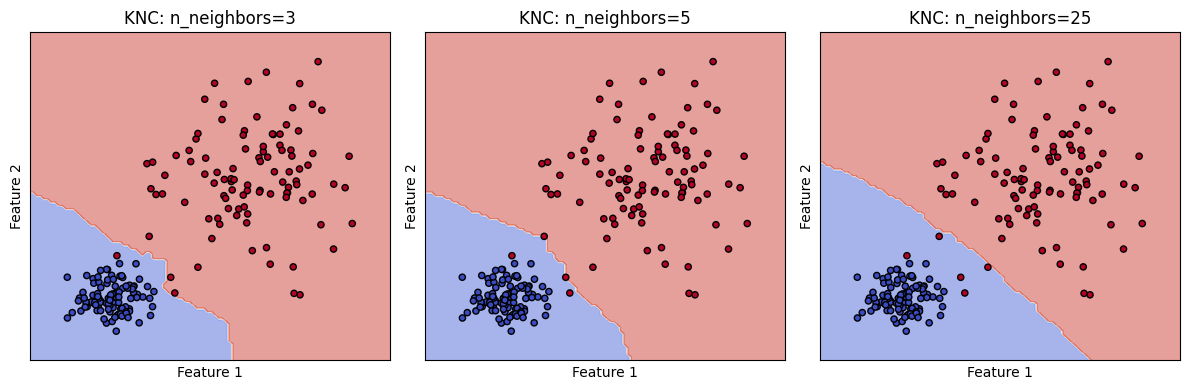

In [ ]:
# สร้างชุดโมเดล
models = [KNC(n_neighbors=3),
          KNC(n_neighbors=5),
          KNC(n_neighbors=25)
          ]

# สอนโมเดลจากข้อมูล x, y ที่สร้างขึ้นก่อนหน้านี้
models = [clf.fit(x, y) for clf in models]

# ตั้งชื่อ plot ที่สอดคล้องกับชุดข้อมูล
titles = ['KNC: n_neighbors=3',
          'KNC: n_neighbors=5',
          'KNC: n_neighbors=25'
          ]

# plot the decision boundaries
fig, axes = plt.subplots(1,3, figsize=(4*3, 4))
for clf, title, ax in zip(models, titles, axes.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(clf,
                                                  x,
                                                  response_method="predict",
                                                  cmap=plt.cm.coolwarm,
                                                  alpha=0.5,
                                                  ax=ax,
                                                  xlabel='Feature 1',
                                                  ylabel='Feature 2',
                                                  )
    ax.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.tight_layout()
plt.show()

การเลือกค่า `n_neighbors` ที่เหมาะสมจะมีความจำเพาะต่อชุดข้อมูล  ยิ่งกำหนดให้ `n_neighbors` มีค่ามากจะช่วยลดผลของ noise ทำให้ได้ decision boundary ที่ smooth แต่ในขณะเดียวกันก็จะทำให้ความสามารถในการจำแนกลดลง ดังจะเห็นได้จากจำนวนข้อมูล class 1 (จุดสีแดง) ที่โมเดลทำนายผิด ว่าเป็น class 0 ที่ปรากฏในพื้นที่สีฟ้า

**Quiz:** ถ้ากำหนดให้ `n_neighbors` มีค่าสูงมากๆ จะเป็นยังไงบ้าง

## k-NN เมื่อปรับค่า `weights` ของจุดข้อมูล

ที่ผ่านมา โมเดลจะจำแนกคลาสของจุดข้อมูลที่สนใจจากจุดข้อมูลที่อยู่ใกล้เคียงจำนวน `n_neighbors` โดยเลือกคลาสที่มีจำนวนมากที่สุดเป็นคลาสของจุดข้อมูลที่สนใจ ซึ่งเป็นการให้น้ำหนักในการโหวดกับทุกจุดข้อมูลเพื่อนบ้านเท่าเทียมกัน หรือ `weights='uniform'` ซึ่งเป็นค่า default ของโมเดล k-NN ในไลบรารี่ `scikit-learn`

แต่หากเรามีสมมติฐานที่ว่า เพื่อนบ้านที่อยู่ใกล้เราที่สุดจะรู้จักเรามากที่สุด เราสามารถเลือกใช้ `weights='distance'` ให้โมเดลสามารถให้น้ำหนักจุดข้อมูลต่างกัน โดยอ้างอิงตามระยะห่างของจุดข้อมูลนั้นและจุดที่สนใจ

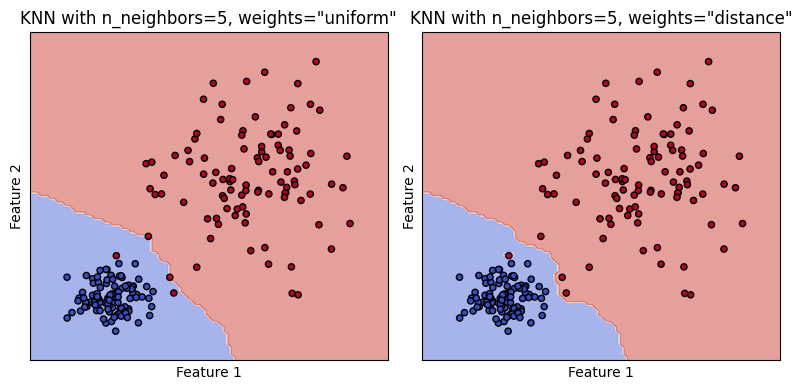

In [ ]:
# สร้างชุดโมเดล
models = [KNC(n_neighbors=5, weights='uniform'),
          KNC(n_neighbors=5, weights='distance')
          ]

# สอนโมเดลจากข้อมูล x, y ที่สร้างขึ้นก่อนหน้านี้
models = [clf.fit(x, y) for clf in models]

# ตั้งชื่อ plot ที่สอดคล้องกับชุดข้อมูล
titles = ['KNN with n_neighbors=5, weights="uniform"',
          'KNN with n_neighbors=5, weights="distance"'
          ]

# plot the decision boundaries
fig, axes = plt.subplots(1,2, figsize=(8, 4))
for clf, title, ax in zip(models, titles, axes.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(clf,
                                                  x,
                                                  response_method="predict",
                                                  cmap=plt.cm.coolwarm,
                                                  alpha=0.5,
                                                  ax=ax,
                                                  xlabel='Feature 1',
                                                  ylabel='Feature 2',
                                                  )
    ax.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.tight_layout()
plt.show()

รูปแสดง decision boundary ของโมเดล k-NN เมื่อเลือกกำหนด `weights` ต่างกัน

**Quiz:** จากรูปเปรียบเทียบ decision boundary สามารถอธิบายได้หรือไม่ว่า `weights` ที่ต่างกันมีผลอย่างไร *(แสดงในวิดีโอ)*

## k-NN Classification Pipeline

ต่อไปเราจะลองพัฒนาโมเดล k-NN อย่างครบกระบวนการ ด้วยชุดข้อมูลที่จะสร้างขึ้น

### Generate 3-class Dataset

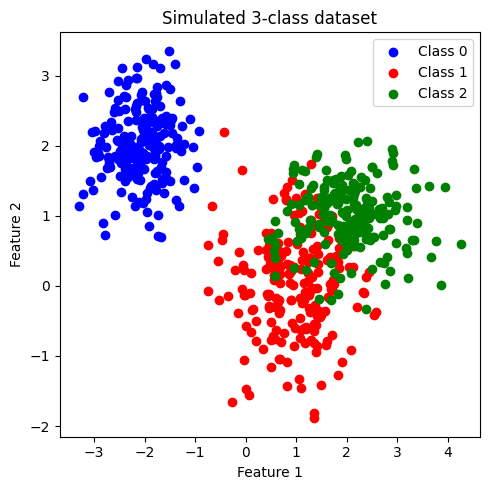

In [ ]:
# สร้างข้อมูลโดยการเรียกใช้ generate_multi_class_dataset
# กำหนด จำนวนคลาส
n_classes = 3

# กำหนดช่วงค่า Mean และ standard deviation สำหรับแต่ละคลาส
mean_class = [[-2,2], [1,0], [2,1]]
std_class  = [[0.5,0.5], [0.75,0.75],[0.75,0.5]]

# กำหนดจำนวนข้อมูล สำหรับแต่ละคลาส
n_samples = 200

# ทำการสร้างชุดข้อมูล
x, y = generate_multi_class_dataset(n_classes, mean_class, std_class,n_samples)

# Plot ข้อมูล x, y ที่สร้างขึ้น
plt.figure(figsize = (5,5))
color_list = ['b','r','g']
for label in range(n_classes):
    plt.scatter(x[y==label, 0], x[y==label, 1], c=color_list[label], label='Class '+str(label))

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Simulated 3-class dataset')
plt.legend()
plt.tight_layout()
plt.show()


ข้อมูลที่สร้างขึ้นมีประกอบด้วย 2 features และ 3 classes (class: 0, 1, 2) โดยข้อมูลในแต่ละคลาสมีจำนวนเท่ากันที่ 200 จุด   เราจะพัฒนาโมเดล k-NN เพื่อจำแนกข้อมูลแต่ละคลาสออกจากกัน

เมื่อสังเกตการกระจายตัวของข้อมูล พบว่า class 0 มีการกระจายข้อมูลแบ่งแยกออกมาอย่างเห็นได้ชัด ในขณะที่ class 1 และ class 2 จะกระจายตัวอยู่ร่วมกัน

### แบ่งข้อมูลเป็น training data และ test data

โดยใช้ [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) จากไลบรารี่ `scikit-learn`

ในตัวอย่างนี้เราจะใช้ default value ซึ่งจะ shuffle ข้อมูลก่อนแบ่งข้อมูล และ ไม่ stratify (ไม่กำกับสัดส่วนของคลาสใน training data และ test data)

อย่างไรก็ดี ในกรณีที่ข้อมูลประกอบด้วยคลาสต่างๆ ที่มีสัดส่วนต่างกันอย่างมาก (imbalanced dataset) การทำ stratify มีความจำเป็นอย่างมากเพื่อคงสัดส่วนของแต่ละคลาส ใน training data และ test data

In [ ]:
# สร้าง training data และ test data โดยแบ่งจากชุดข้อมูล x,y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    stratify=None,
                                                    shuffle=True,
                                                    random_state=RANDOM_SEED)

print('Train set: จำนวนข้อมูล แบ่งกลุ่มตาม class label')
unique, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

print('Test set: จำนวนข้อมูล แบ่งกลุ่มตาม class label')
unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)).T)

Train set: จำนวนข้อมูล แบ่งกลุ่มตาม class label
[[  0. 169.]
 [  1. 155.]
 [  2. 156.]]
Test set: จำนวนข้อมูล แบ่งกลุ่มตาม class label
[[ 0. 31.]
 [ 1. 45.]
 [ 2. 44.]]


### ทำการ standardize ข้อมูลทั้งหมด
ใช้ mean และ standard deviation (SD) จาก training data ในการ standardize test set เพื่อป้องกัน information leak

In [ ]:
# สร้าง standardized scaler จาก features ใน training data
x_scaler = StandardScaler().fit(x_train)

# scale ค่า features ใน training data และ test data
x_train = x_scaler.transform(x_train)
x_test  = x_scaler.transform(x_test)

### เทรนโมเดล ด้วย base model (default hyperparameter)

Training Set: Classification report
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       169
         1.0       0.89      0.87      0.88       155
         2.0       0.89      0.89      0.89       156

    accuracy                           0.92       480
   macro avg       0.92      0.92      0.92       480
weighted avg       0.92      0.92      0.92       480


Test Set: Classification report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        31
         1.0       0.81      0.87      0.84        45
         2.0       0.85      0.80      0.82        44

    accuracy                           0.88       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.88      0.88      0.87       120



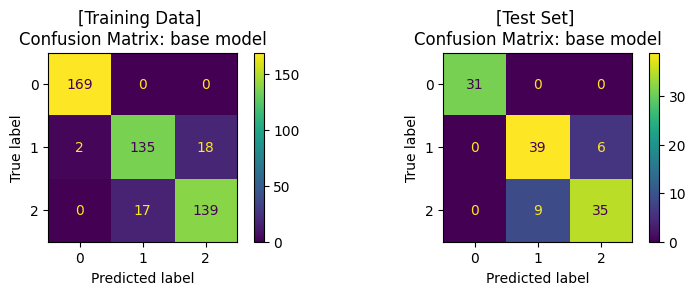

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

# สร้างโมเดล
base_clf = KNC()

# สอนโมเดลด้วย training data
base_clf.fit(x_train,y_train)

# ให้โมเดลทำนาย training data
y_pred = base_clf.predict(x_train)

# แสดงผล classification ของโมเดลจาก training data
print('Training Set: Classification report')
print(classification_report(y_train, y_pred))

# คำนวนและแสดงผล confusion matrix ของ training data
cm = confusion_matrix(y_train, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(ax=ax1)
ax1.set_title('[Training Data] \nConfusion Matrix: base model')

# ให้โมเดลทำนาย test data
y_pred = base_clf.predict(x_test)

# แสดงผล classification ของโมเดล
print('\nTest Set: Classification report')
print(classification_report(y_test, y_pred))

# คำนวนและแสดงผล confusion matrix ของ test set
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(ax=ax2)
ax2.set_title('[Test Set] \nConfusion Matrix: base model')

plt.tight_layout()
plt.show()

### ปรับแต่งโมเดล (Hyperparameter Tuning) ด้วย [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) และ train โมเดล

โดยเราจะปรับแต่งโมเดล โดย tune 2 hyperparameters ที่สำคัญของโมเดล k-NN ได้แก่
1. `weights`
2. `n_neighbors`

ในไลบรารี่ `scikit-learn` ยังมีวิธีการอื่นๆ ในการปรับแต่งโมเดล เช่น
- [CrossValScore](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)
- [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)



Best hyperparameters: {'n_neighbors': 7, 'weights': 'distance'}
Best cross-validation score: 0.90
Training Set: Classification report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       169
         1.0       1.00      1.00      1.00       155
         2.0       1.00      1.00      1.00       156

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480


Test Set: Classification report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        31
         1.0       0.83      0.89      0.86        45
         2.0       0.88      0.82      0.85        44

    accuracy                           0.89       120
   macro avg       0.90      0.90      0.90       120
weighted avg       0.89      0.89      0.89       120



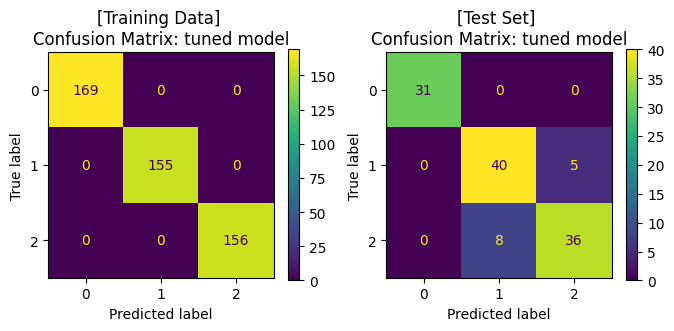

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

# กำหนดช่วงค่า hyperparameters ในรูปแบบ dictionary
clf_params = {'weights': ['uniform','distance'],
              'n_neighbors': [3, 5, 7, 9, 11]
              }

# แบ่งข้อมูล training data ด้วย 5-fold cross-validation เพื่อ tune hyperparameter
cv_splitter = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

# ใช้ GridSearchCV เพื่อสอนโมเดลจากชุดค่า hyperparameters จาก clf_params
# และคำนวณค่า accuracy ของแต่ละโมเดล เพื่อเลือกชุด hyperparameters ที่ดีที่สุด
# โดยใช้เทคนิค cross-validation ในการแบ่งกลุ่ม validation data จาก training data
tuned_clf = GridSearchCV(estimator=base_clf, param_grid=clf_params,
                             scoring=['accuracy'], refit='accuracy', cv=cv_splitter)

# fit โมเดลด้วย training data และ ให้โมเดลทำนายค่า y จาก training data
tuned_clf.fit(x_train, y_train)
y_pred = tuned_clf.predict(x_train)

# แสดงผล hyperparameters ที่ดีที่สุด และ cross-validation score
print('Best hyperparameters: {}'.format(tuned_clf.best_params_))
print("Best cross-validation score: {:.2f}".format(tuned_clf.best_score_))

# แสดงผล classification ของโมเดลจาก training data
print('Training Set: Classification report')
print(classification_report(y_train, y_pred))

# คำนวนและแสดงผล confusion matrix ของโมเดลจาก training data
cm = confusion_matrix(y_train, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(ax=ax1)
ax1.set_title('[Training Data] \nConfusion Matrix: tuned model')

# ให้โมเดลทำนายค่า y จาก test data
y_pred = tuned_clf.predict(x_test)

# แสดงผล classification ของโมเดล จาก test data
print('\nTest Set: Classification report')
print(classification_report(y_test, y_pred))
# คำนวนและแสดงผล confusion matrix จาก test data
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(ax=ax2)
ax2.set_title('[Test Set] \nConfusion Matrix: tuned model')

plt.show()

จะสังเกตได้ว่า เมื่อมีการปรับจูน hyperparameters ของโมเดลให้มีความเหมาะสมแล้ว เราได้โมเดลที่เรียนรู้จากข้อมูลชุดเดิม แล้วสามารถทำนาย test data ได้ค่า accuracy ที่สูงขึ้น โดยเมื่อพิจารณา Confusion Matrix จะพบว่า โมเดลสามารถจำแนกข้อมูล class 1 และ class 2 ได้ดีขึ้น

### Decision Boundary

เราจะมาลองดู decision boundary ของโมเดลบน training data และ test data

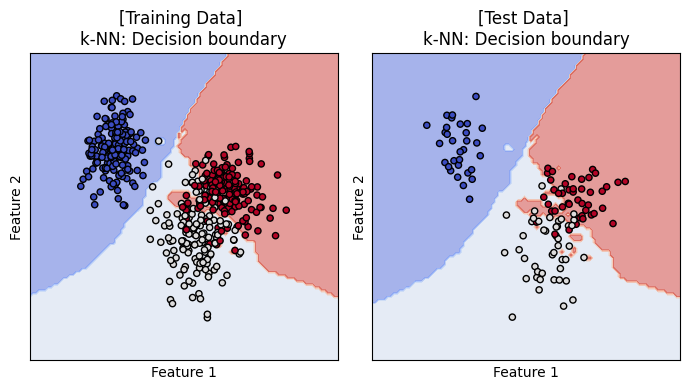

In [ ]:
# plot the decision boundaries
fig, axes = plt.subplots(1,2, figsize=(7, 4))
titles = ['[Training Data] \nk-NN: Decision boundary', '[Test Data] \nk-NN: Decision boundary']
for x, y, title, ax in zip([x_train, x_test], [y_train, y_test], titles, axes.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(tuned_clf,
                                                  x,
                                                  response_method="predict",
                                                  cmap=plt.cm.coolwarm,
                                                  alpha=0.5,
                                                  ax=ax,
                                                  xlabel='Feature 1',
                                                  ylabel='Feature 2',
                                                  )
    ax.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.tight_layout()
plt.show()

แสดง decision boundary ของโมเดล k-NN เมื่อ `n_neighbors=7` และ `weights='distance'` ซึ่งเป็นโมเดลที่ได้รับการปรับจูนให้เหมาะสมกับการเรียนรู้จากชุดข้อมูลนี้

**Discuss:** ข้อเสียของโมเดล k-NN

ถ้า data เยอะ k-NN algorithms จะไม่มีประสิทธิภาพ เพราะ ต้องคำนวณหา distance ของแต่ละจุด เพื่อหา neigbours ซึ่งใช้เวลานานขึ้นตามขนาดของชุดข้อมูล  และเมื่อมีข้อมูลเข้ามาเพิ่ม ก็ต้องคำนวณ distance ใหม่

**ผู้จัดเตรียม code ใน tutorial**: ดร. กนกกร พิมพ์เจริญ